Overleaf editable: https://www.overleaf.com/3357166138bzryfmvrkqrh

### Importación de librerías

In [11]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tfkl
from tensorflow.keras.datasets import fashion_mnist

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import time
import pickle


In [ ]:
import sklearn as sk

### Carga de modelos GBM ya entrenados

In [22]:
!wget 'https://drive.google.com/file/d/1nRppCk2zLO-WNIrl2VdeFwtOe3jWaGpW/view?usp=sharing' -O gbms_ne.zip

--2022-06-20 05:40:26--  https://drive.google.com/file/d/1nRppCk2zLO-WNIrl2VdeFwtOe3jWaGpW/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.253.115.101, 172.253.115.102, 172.253.115.100, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘gbms_ne.zip’

gbms_ne.zip             [ <=>                ]  64.74K  --.-KB/s    in 0.002s  

2022-06-20 05:40:26 (38.6 MB/s) - ‘gbms_ne.zip’ saved [66298]



In [23]:
!jar xvf gbms_ne.zip

java.util.zip.ZipException: zip END header not found
	at java.base/java.util.zip.ZipFile$Source.zerror(ZipFile.java:1607)
	at java.base/java.util.zip.ZipFile$Source.findEND(ZipFile.java:1497)
	at java.base/java.util.zip.ZipFile$Source.initCEN(ZipFile.java:1504)
	at java.base/java.util.zip.ZipFile$Source.<init>(ZipFile.java:1308)
	at java.base/java.util.zip.ZipFile$Source.get(ZipFile.java:1271)
	at java.base/java.util.zip.ZipFile$CleanableResource.<init>(ZipFile.java:733)
	at java.base/java.util.zip.ZipFile$CleanableResource.get(ZipFile.java:850)
	at java.base/java.util.zip.ZipFile.<init>(ZipFile.java:248)
	at java.base/java.util.zip.ZipFile.<init>(ZipFile.java:177)
	at java.base/java.util.zip.ZipFile.<init>(ZipFile.java:148)
	at jdk.jartool/sun.tools.jar.Main.extract(Main.java:1388)
	at jdk.jartool/sun.tools.jar.Main.run(Main.java:410)
	at jdk.jartool/sun.tools.jar.Main.main(Main.java:1680)


In [24]:
!unzip gbms_ne

Archive:  gbms_ne.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of gbms_ne or
        gbms_ne.zip, and cannot find gbms_ne.ZIP, period.


In [15]:
!wget --no-check-certificate 'https://drive.google.com/file/d/1bGpmUikxWhgM5u-IB7wQs8tZIB9IpUGl/view?usp=sharing' -O best_gbm.pkl
!wget --no-check-certificate 'https://drive.google.com/file/d/1aRFYuLReedoRBYEqfMH77DqaOO-7Xyyd/view?usp=sharing' -O gbm_ne_10_secs_568.pkl
!wget --no-check-certificate 'https://drive.google.com/file/d/1YXOPIJriI_IIOwIOrIJpQ8-Fg4hJj158/view?usp=sharing' -O gbm_ne_30_secs_1700.pkl
!wget --no-check-certificate 'https://drive.google.com/file/d/1rTQUXo_EAQKX1CJuBZBKHvR7nYa83T1a/view?usp=sharing' -O gbm_ne_50_secs_2813.pkl
#faltan los de max_depth

--2022-06-20 05:34:49--  https://drive.google.com/file/d/1bGpmUikxWhgM5u-IB7wQs8tZIB9IpUGl/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.253.115.139, 172.253.115.100, 172.253.115.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘best_gbm.pkl’

best_gbm.pkl            [ <=>                ]  64.32K  --.-KB/s    in 0.005s  

2022-06-20 05:34:49 (11.4 MB/s) - ‘best_gbm.pkl’ saved [65862]

--2022-06-20 05:34:49--  https://drive.google.com/file/d/1aRFYuLReedoRBYEqfMH77DqaOO-7Xyyd/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.253.115.139, 172.253.115.113, 172.253.115.102, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘gbm_ne_10_secs_568.pkl’

gbm_ne_10_secs_568.     [ <=>          

### Carga de datos

In [3]:
! git clone https://github.com/zalandoresearch/fashion-mnist

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 3 (delta 0), pack-reused 758
Receiving objects: 100% (762/762), 105.85 MiB | 30.06 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [4]:
(dev_images, dev_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


### Análisis del dataset

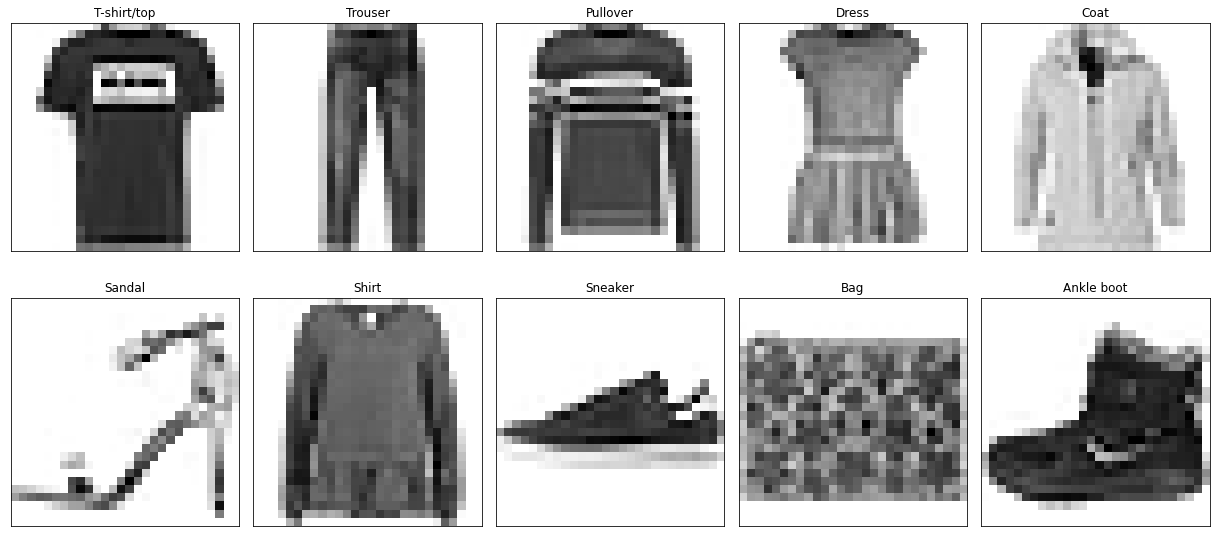

In [ ]:
plt.figure(figsize=(17,8))
for i,label_val in enumerate(np.unique(dev_labels)):
  label_idxs = np.argwhere(dev_labels == label_val)
  plt.subplot(2,5,i+1)
  plt.title(class_names[label_val])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(dev_images[label_idxs[0]]),cmap='binary')
plt.tight_layout()

In [ ]:
pd.Series([len(image) for image in dev_images]).value_counts()

28    60000
dtype: int64

In [ ]:
pd.Series([len(image) for image in test_images]).value_counts()

28    10000
dtype: int64

In [ ]:
pd.Series([len(image) for image in test_images]).value_counts()

28    10000
dtype: int64

In [ ]:
np.unique(tfkl.Flatten()(dev_images))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
np.unique(tfkl.Flatten()(test_images))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
pd.Series(dev_labels).value_counts(normalize=True)

9    0.1
0    0.1
3    0.1
2    0.1
7    0.1
5    0.1
1    0.1
6    0.1
4    0.1
8    0.1
dtype: float64

In [ ]:
pd.Series(test_labels).value_counts(normalize=True)

9    0.1
0    0.1
3    0.1
2    0.1
7    0.1
5    0.1
1    0.1
6    0.1
4    0.1
8    0.1
dtype: float64

### Partición del conjunto de desarrollo

In [6]:
train_images,val_images,train_labels,val_labels = train_test_split(dev_images,dev_labels,test_size=0.2,random_state=42)

In [ ]:
pd.Series(train_labels).value_counts(normalize=True)

7    0.100854
3    0.100333
8    0.100062
0    0.099958
4    0.099958
9    0.099937
2    0.099896
5    0.099771
6    0.099625
1    0.099604
dtype: float64

In [ ]:
pd.Series(val_labels).value_counts(normalize=True)

1    0.101583
6    0.101500
5    0.100917
2    0.100417
9    0.100250
4    0.100167
0    0.100167
8    0.099750
3    0.098667
7    0.096583
dtype: float64

### Transformación de datasets

In [7]:
flatten_train = tfkl.Flatten()(train_images)
flatten_val = tfkl.Flatten()(val_images)
flatten_test = tfkl.Flatten()(test_images)

### Testeo de modelos con parámetros default

In [ ]:
arbol_sk = DecisionTreeClassifier(random_state=42)
naivebayes_sk = MultinomialNB()
bagging_sk = RandomForestClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)

models = [arbol_sk,naivebayes_sk,bagging_sk,ada_boost]

for model in models:
  model.fit(flatten_train,train_labels)
  labels_pred_val = model.predict(flatten_val)
  labels_pred_train = model.predict(flatten_train)
  
  print(f"--------------------------------------------------------------\n{model}\ntrain:\n{classification_report(train_labels, labels_pred_train)}\nvalidation:\n{classification_report(val_labels, labels_pred_val)}")
  
  

--------------------------------------------------------------
DecisionTreeClassifier(random_state=42)
train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4836
           1       1.00      1.00      1.00      4737
           2       1.00      1.00      1.00      4789
           3       1.00      1.00      1.00      4793
           4       1.00      1.00      1.00      4816
           5       1.00      1.00      1.00      4811
           6       1.00      1.00      1.00      4821
           7       1.00      1.00      1.00      4831
           8       1.00      1.00      1.00      4797
           9       1.00      1.00      1.00      4769

    accuracy                           1.00     48000
   macro avg       1.00      1.00      1.00     48000
weighted avg       1.00      1.00      1.00     48000

validation:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1164
          

## Random Forest

### Testeamos n_estimators en Random Forest

In [ ]:
rango = range(1,101,5)

accuracies_val = []
accuracies_train = []
precisions_val = []
precisions_train = []
recalls_val = []
recalls_train = []
f1s_val = []
f1s_train = []
duracion = []

for n in rango:

  rfc = RandomForestClassifier(n_estimators = n, n_jobs = -1, random_state=42)
  
  inicio = time.time()

  rfc.fit(flatten_train,train_labels)
  
  labels_pred_val = rfc.predict(flatten_val)
  labels_pred_train = rfc.predict(flatten_train)

  fin = time.time()

  accuracies_val.append(accuracy_score(val_labels,labels_pred_val))
  accuracies_train.append(accuracy_score(train_labels,labels_pred_train))
  precisions_val.append(precision_score(val_labels,labels_pred_val,average='weighted'))
  precisions_train.append(precision_score(train_labels,labels_pred_train,average='weighted'))
  recalls_val.append(recall_score(val_labels,labels_pred_val,average='weighted'))
  recalls_train.append(recall_score(train_labels,labels_pred_train,average='weighted'))
  f1s_val.append(f1_score(val_labels,labels_pred_val,average='weighted'))
  f1s_train.append(f1_score(train_labels,labels_pred_train,average='weighted'))
  duracion.append(round(fin-inicio,2))


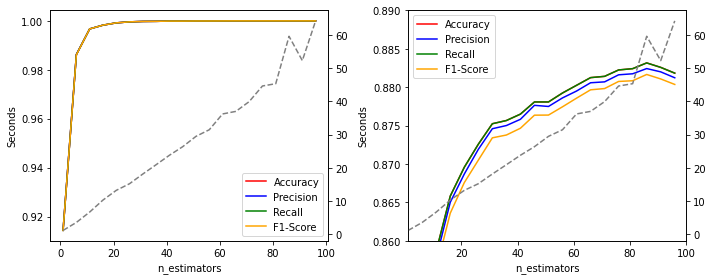

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1a = ax1.twinx()
ax1.plot(rango, accuracies_train, label = 'Accuracy', color='red')
ax1.plot(rango, precisions_train, label = 'Precision', color='blue')
ax1.plot(rango, recalls_train, label = 'Recall', color='green')
ax1.plot(rango, f1s_train, label = 'F1-Score', color='orange')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Metrics')
ax1a.plot(rango, duracion, color='gray',linestyle='--')
ax1.set_ylabel('Seconds')
ax1.legend()

ax2a = ax2.twinx()
ax2.plot(rango, accuracies_val, label = 'Accuracy', color='red')
ax2.plot(rango, precisions_val, label = 'Precision', color='blue')
ax2.plot(rango, recalls_val, label = 'Recall', color='green')
ax2.plot(rango, f1s_val, label = 'F1-Score', color='orange')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('Metrics')
ax2a.plot(rango, duracion, color='gray',linestyle='--')
ax2.set_ylabel('Seconds')

ax2.axis([1, 100, 0.86, 0.89])
ax2.legend()

plt.tight_layout()
plt.show()

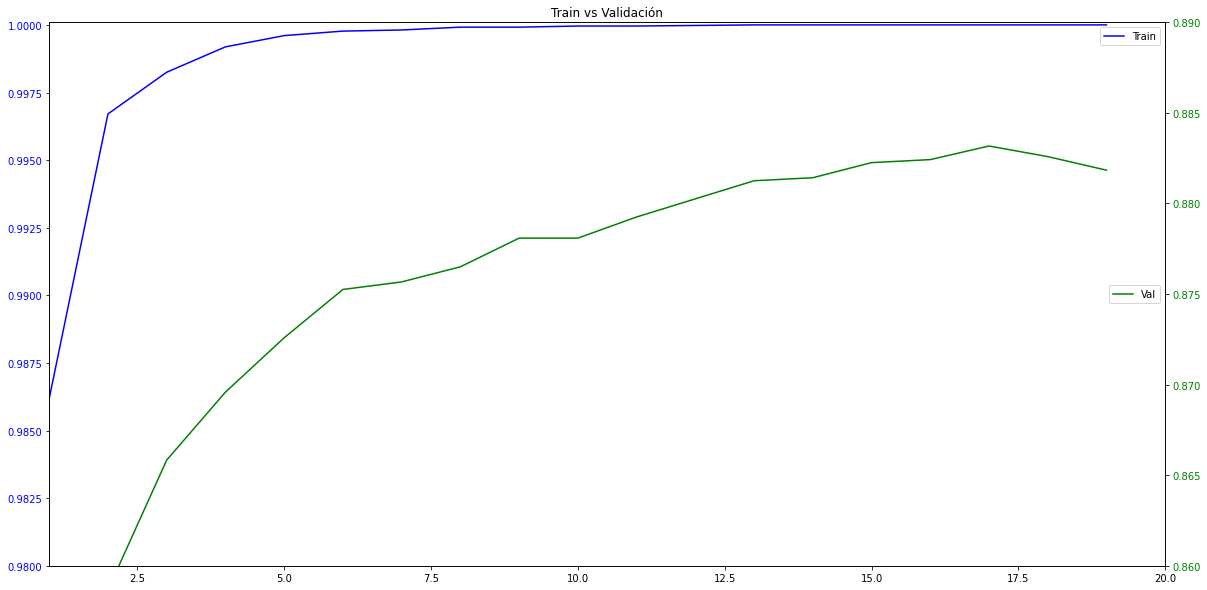

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))

# Plot linear sequence, and set tick labels to the same color
ax.plot(accuracies_train, color='blue',label = "Train" )
ax.tick_params(axis='y', labelcolor='blue')
ax.axis([1, 20, 0.98, 1.0001])
ax.legend(loc='upper right')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(accuracies_val, color='green', label = "Val")
ax2.tick_params(axis='y', labelcolor='green')
ax2.axis([1, 20, 0.86, 0.89])
ax2.legend(loc='center right')

plt.title("Train vs Validación")
plt.show()

Como vemos que con mas de 20 n_estimators el valor del entrenamiento tiende a 1 y el rango de duracion es de 1 a 70, nos basamos en el resultado de la validación para decidir que estimador tomamos.

In [ ]:
print(f'Val Accuracy: {round(max(accuracies_val),4)} \nn_estimators: {accuracies_val.index(max(accuracies_val))*5+1} \nduración: {duracion[accuracies_val.index(max(accuracies_val))]}')
print(f'Val Precision: {round(max(precisions_val),4)} \nn_estimators: {precisions_val.index(max(precisions_val))*5+1} \nduración: {duracion[precisions_val.index(max(precisions_val))]}')
print(f'Val Recall: {round(max(recalls_val),4)} \nn_estimators: {recalls_val.index(max(recalls_val))*5+1} \nduración: {duracion[recalls_val.index(max(recalls_val))]}')
print(f'Val F1-Score: {round(max(f1s_val),4)} \nn_estimators: {f1s_val.index(max(f1s_val))*5+1} \nduración: {duracion[f1s_val.index(max(f1s_val))]}')

Val Accuracy: 0.8832 
n_estimators: 86 
duración: 59.55
Val Precision: 0.8824 
n_estimators: 86 
duración: 59.55
Val Recall: 0.8832 
n_estimators: 86 
duración: 59.55
Val F1-Score: 0.8817 
n_estimators: 86 
duración: 59.55


El valor óptimo de n_estimators (con todos los demás parámetros en su valor por defecto) es 86, independientemente de la métrica adoptada entre las consideradas.

### Testeamos max_depth en Random Forest (dado n_estimators = 86)


In [ ]:
rango_md = range(10,101,10)

accuracies_val_md = []
accuracies_train_md = []
precisions_val_md = []
precisions_train_md = []
recalls_val_md = []
recalls_train_md = []
f1s_val_md = []
f1s_train_md = []
duracion_md = []

for md in rango_md:

  rfc = RandomForestClassifier(n_estimators = 86, max_depth = md, n_jobs = -1, random_state=42)
  
  inicio = time.time()

  rfc.fit(flatten_train,train_labels)
  
  labels_pred_val = rfc.predict(flatten_val)
  labels_pred_train = rfc.predict(flatten_train)

  fin = time.time()

  accuracies_val_md.append(accuracy_score(val_labels,labels_pred_val))
  accuracies_train_md.append(accuracy_score(train_labels,labels_pred_train))
  precisions_val_md.append(precision_score(val_labels,labels_pred_val,average='weighted'))
  precisions_train_md.append(precision_score(train_labels,labels_pred_train,average='weighted'))
  recalls_val_md.append(recall_score(val_labels,labels_pred_val,average='weighted'))
  recalls_train_md.append(recall_score(train_labels,labels_pred_train,average='weighted'))
  f1s_val_md.append(f1_score(val_labels,labels_pred_val,average='weighted'))
  f1s_train_md.append(f1_score(train_labels,labels_pred_train,average='weighted'))
  duracion_md.append(round(fin-inicio,2))


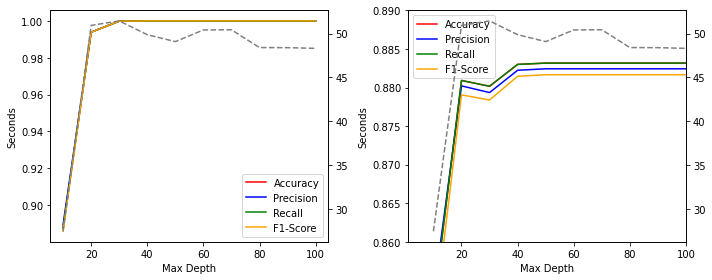

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1a = ax1.twinx()
ax1.plot(rango_md, accuracies_train_md, label = 'Accuracy', color='red')
ax1.plot(rango_md, precisions_train_md, label = 'Precision', color='blue')
ax1.plot(rango_md, recalls_train_md, label = 'Recall', color='green')
ax1.plot(rango_md, f1s_train_md, label = 'F1-Score', color='orange')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Metrics')
ax1a.plot(rango_md, duracion_md, color='gray',linestyle='--')
ax1.set_ylabel('Seconds')
ax1.legend()

ax2a = ax2.twinx()
#nótese que el promedio pesado de recall es igual a accuracy
ax2.plot(rango_md, accuracies_val_md, label = 'Accuracy', color='red')
ax2.plot(rango_md, precisions_val_md, label = 'Precision', color='blue')
ax2.plot(rango_md, recalls_val_md, label = 'Recall', color='green')
ax2.plot(rango_md, f1s_val_md, label = 'F1-Score', color='orange')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('Metrics')
ax2a.plot(rango_md, duracion_md, color='gray',linestyle='--')
ax2.set_ylabel('Seconds')
ax2.legend()

ax2.axis([1, 100, 0.86, 0.89])

plt.tight_layout()
plt.show()

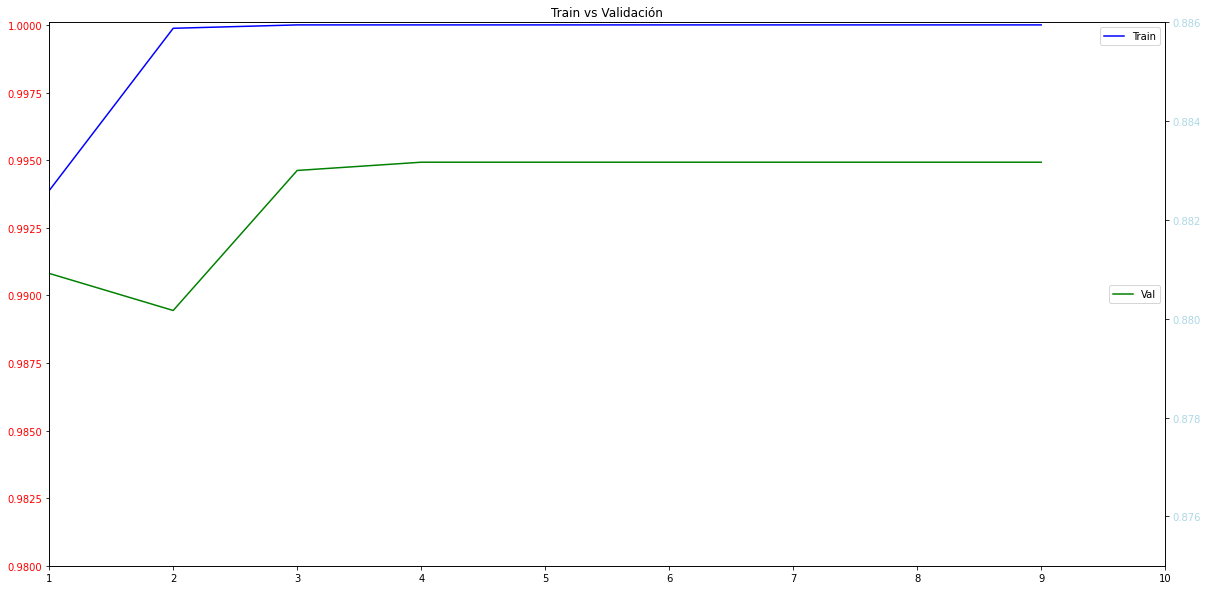

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))

# Plot linear sequence, and set tick labels to the same color
ax.plot(accuracies_train_md, color='blue',label = "Train" )
ax.tick_params(axis='y', labelcolor='red')
ax.axis([1, 10, 0.98, 1.0001])
ax.legend(loc='upper right')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(accuracies_val_md, color='green', label = "Val")
ax2.tick_params(axis='y', labelcolor='lightblue')
ax2.axis([1, 10, 0.875, 0.886])
ax2.legend(loc='center right')

plt.title("Train vs Validación")
plt.show()

In [ ]:
print(f'Val Accuracy: {round(max(accuracies_val_md),4)} \nmax_depth: {accuracies_val_md.index(max(accuracies_val_md))*10+10} \nduración: {duracion_md[accuracies_val_md.index(max(accuracies_val_md))]}')
print(f'Val Precision: {round(max(precisions_val_md),4)} \nmax_depth: {precisions_val_md.index(max(precisions_val_md))*10+10} \nduración: {duracion_md[precisions_val_md.index(max(precisions_val_md))]}')
print(f'Val Recall: {round(max(recalls_val_md),4)} \nmax_depth: {recalls_val_md.index(max(recalls_val_md))*10+10} \nduración: {duracion_md[recalls_val_md.index(max(recalls_val_md))]}')
print(f'Val F1-Score: {round(max(f1s_val_md),4)} \nmax_depth: {f1s_val_md.index(max(f1s_val_md))*10+10} \nduración: {duracion_md[f1s_val_md.index(max(f1s_val_md))]}')

Val Accuracy: 0.8832 
max_depth: 50 
duración: 49.08
Val Precision: 0.8824 
max_depth: 50 
duración: 49.08
Val Recall: 0.8832 
max_depth: 50 
duración: 49.08
Val F1-Score: 0.8817 
max_depth: 50 
duración: 49.08


En conclusión, de acuerdo a la metodología adoptada, los hiperparámetros óptimos para RandomForest son n_estimators=86 y max_depth=50

## Gradient Boosting Machine

### Testeamos n_estimators en Gradient Boosting



In [34]:
## en lugar de esto corremos la de abajo para no tener que reentrenar los modelos cada vez.

# rango_gbm = [10,30,50] #Como la ejecución de GBM es muy prolongada vamos a hacer un testeo con 3 valores para n_estimators y luego profundizamos en el rango cercano al que traiga mejores resultados.

# accuracies_val_gbm = []
# accuracies_train_gbm = []
# precisions_val_gbm = []
# precisions_train_gbm = []
# recalls_val_gbm = []
# recalls_train_gbm = []
# f1s_val_gbm = []
# f1s_train_gbm = []
# duracion_gbm = []

# for n in rango_gbm:

#   gbm = GradientBoostingClassifier(n_estimators = n, random_state=42)
  
#   inicio = time.time()

#   gbm.fit(flatten_train,train_labels)
  
#   labels_pred_val = gbm.predict(flatten_val)
#   labels_pred_train = gbm.predict(flatten_train)

#   fin = time.time()

#   accuracies_val_gbm.append(accuracy_score(val_labels,labels_pred_val))
#   accuracies_train_gbm.append(accuracy_score(train_labels,labels_pred_train))
#   precisions_val_gbm.append(precision_score(val_labels,labels_pred_val,average='weighted'))
#   precisions_train_gbm.append(precision_score(train_labels,labels_pred_train,average='weighted'))
#   recalls_val_gbm.append(recall_score(val_labels,labels_pred_val,average='weighted'))
#   recalls_train_gbm.append(recall_score(train_labels,labels_pred_train,average='weighted'))
#   f1s_val_gbm.append(f1_score(val_labels,labels_pred_val,average='weighted'))
#   f1s_train_gbm.append(f1_score(train_labels,labels_pred_train,average='weighted'))
#   duracion_gbm.append(round(fin-inicio,2))

#   model_name = 'gbm_ne_' + str(n) + '_secs_' + str(round(fin-inicio,2))[:-3]
#   pickle.dump(gbm, open(model_name+'.pkl', 'wb'))

In [12]:
rango_gbm = []
accuracies_val_gbm = []
accuracies_train_gbm = []
precisions_val_gbm = []
precisions_train_gbm = []
recalls_val_gbm = []
recalls_train_gbm = []
f1s_val_gbm = []
f1s_train_gbm = []
duracion_gbm = []

for model_filename in ['gbm_ne_10_secs_568.pkl', 'gbm_ne_30_secs_1700.pkl', 'gbm_ne_50_secs_2813.pkl']:
  with open(model_filename,'rb') as m:
    gbm = pickle.load(m)

  labels_pred_val = gbm.predict(flatten_val)
  labels_pred_train = gbm.predict(flatten_train)

  accuracies_val_gbm.append(accuracy_score(val_labels,labels_pred_val))
  accuracies_train_gbm.append(accuracy_score(train_labels,labels_pred_train))
  precisions_val_gbm.append(precision_score(val_labels,labels_pred_val,average='weighted'))
  precisions_train_gbm.append(precision_score(train_labels,labels_pred_train,average='weighted'))
  recalls_val_gbm.append(recall_score(val_labels,labels_pred_val,average='weighted'))
  recalls_train_gbm.append(recall_score(train_labels,labels_pred_train,average='weighted'))
  f1s_val_gbm.append(f1_score(val_labels,labels_pred_val,average='weighted'))
  f1s_train_gbm.append(f1_score(train_labels,labels_pred_train,average='weighted'))
  
  duracion_ = float(model_filename[15:-4])
  duracion_gbm.append(duracion_)

  rango_ = int(model_filename[7:9])
  rango_gbm.append(rango_)

UnpicklingError: ignored

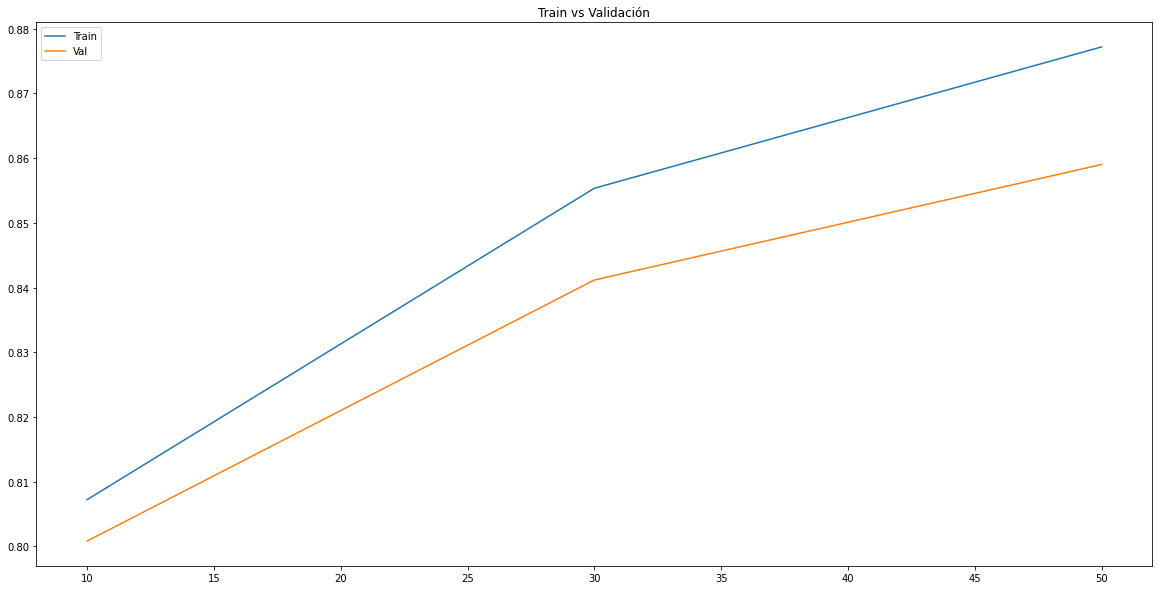

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
plt.title("Train vs Validación")
plt.plot(rango_gbm, accuracies_train_gbm, label = "Train")
plt.plot(rango_gbm, accuracies_val_gbm, label = "Val")
plt.legend()
plt.show()

In [ ]:
duracion_gbm = list(map(lambda x: round(x / 60), duracion_gbm))#Pasamos a minutos la duracion

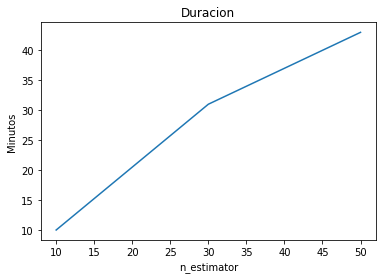

In [ ]:
plt.plot(rango_gbm,duracion_gbm)
plt.title("Duracion")
plt.xlabel('n_estimator')
plt.ylabel('Minutos')
plt.show()

Vemos que el aumento de la duracion es proporcional al aumento de n_estimators, lo cual tiene logica en gbm ya que los se corre secuencialmente.

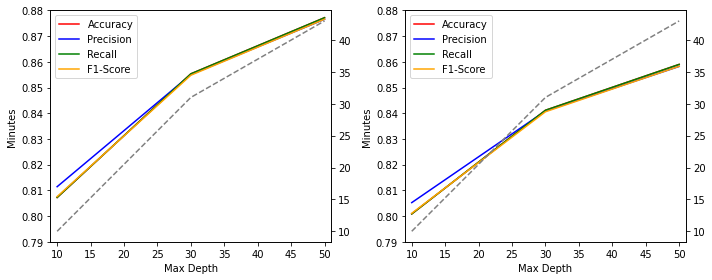

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1a = ax1.twinx()
ax1.plot(rango_gbm, accuracies_train_gbm, label = 'Accuracy', color='red')
ax1.plot(rango_gbm, precisions_train_gbm, label = 'Precision', color='blue')
ax1.plot(rango_gbm, recalls_train_gbm, label = 'Recall', color='green')
ax1.plot(rango_gbm, f1s_train_gbm, label = 'F1-Score', color='orange')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Metrics')
ax1a.plot(rango_gbm, duracion_gbm, color='gray',linestyle='--')
ax1.set_ylabel('Minutes')
ax1.legend()

ax2a = ax2.twinx()
#nótese que el promedio pesado de recall es igual a accuracy
ax2.plot(rango_gbm, accuracies_val_gbm, label = 'Accuracy', color='red')
ax2.plot(rango_gbm, precisions_val_gbm, label = 'Precision', color='blue')
ax2.plot(rango_gbm, recalls_val_gbm, label = 'Recall', color='green')
ax2.plot(rango_gbm, f1s_val_gbm, label = 'F1-Score', color='orange')
ax2.set_xlabel('n_estimators')
ax2.set_ylabel('Metrics')
ax2a.plot(rango_gbm, duracion_gbm, color='gray',linestyle='--')
ax2.set_ylabel('Minutes')
ax2.legend()

ax1.axis([9, 51, 0.79, 0.88])
ax2.axis([9, 51, 0.79, 0.88])

plt.tight_layout()
plt.show()

In [ ]:
i = 0
while i < len(rango_gbm):
  print(f'Val Accuracy: {round(accuracies_val_gbm[i],4)}\nVal Precision: {round(precisions_val_gbm[i],4)}\nVal Recall: {round(recalls_val_gbm[i],4)}\nVal F1-Score: {round(f1s_val_gbm[i],4)}\nn_estimator: {rango_gbm[i]} \nduración: {duracion_gbm[i]} minutos\n-----------------------------------')
  i+=1

Val Accuracy: 0.8008
Val Precision: 0.8052
Val Recall: 0.8008
Val F1-Score: 0.8011
n_estimator: 10 
duración: 10 minutos
-----------------------------------
Val Accuracy: 0.8412
Val Precision: 0.8409
Val Recall: 0.8412
Val F1-Score: 0.8406
n_estimator: 30 
duración: 31 minutos
-----------------------------------
Val Accuracy: 0.859
Val Precision: 0.8582
Val Recall: 0.859
Val F1-Score: 0.8582
n_estimator: 50 
duración: 43 minutos
-----------------------------------


El n_estimator óptimo es 50, si bien tiene una larga duración, y aunque su mejora es menos significativa que de 30 a 10.

### Testeamos max_depth en Gradient Boosting

Para el n_estimator elegido vamos a testear cual es el max_depth optimo.El valor default es 3 por lo que partimos de ahí.

In [ ]:
rango_gbm_md = [1,4,6,8] 

accuracies_val_gbm_md = []
accuracies_train_gbm_md = []
precisions_val_gbm_md = []
precisions_train_gbm_md = []
recalls_val_gbm_md = []
recalls_train_gbm_md = []
f1s_val_gbm_md = []
f1s_train_gbm_md = []
duracion_gbm_md = []
modelos = []
labels_pred_val_list = []
labels_pred_train_list = []

for md in rango_gbm_md:

  gbm = GradientBoostingClassifier(n_estimators = 50 , max_depth = md, random_state=42)
  
  inicio = time.time()

  gbm.fit(flatten_train,train_labels)

  modelos.append(gbm)
  
  labels_pred_val = gbm.predict(flatten_val)
  labels_pred_train = gbm.predict(flatten_train)

  labels_pred_val_list.append(labels_pred_val)
  labels_pred_train_list.append(labels_pred_train)

  fin = time.time()

  accuracies_val_gbm_md.append(accuracy_score(val_labels,labels_pred_val))
  accuracies_train_gbm_md.append(accuracy_score(train_labels,labels_pred_train))
  precisions_val_gbm_md.append(precision_score(val_labels,labels_pred_val,average='weighted'))
  precisions_train_gbm_md.append(precision_score(train_labels,labels_pred_train,average='weighted'))
  recalls_val_gbm_md.append(recall_score(val_labels,labels_pred_val,average='weighted'))
  recalls_train_gbm_md.append(recall_score(train_labels,labels_pred_train,average='weighted'))
  f1s_val_gbm_md.append(f1_score(val_labels,labels_pred_val,average='weighted'))
  f1s_train_gbm_md.append(f1_score(train_labels,labels_pred_train,average='weighted'))
  duracion_gbm_md.append(round(fin-inicio,2))

  model_name = 'gbm_ne_50_md_' + str(md) + 'secs_' + str(round(fin-inicio,2))[:-3]
  pickle.dump(gbm, open(model_name+'.pkl', 'wb'))

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
plt.title("Train vs Validación")
plt.plot(rango_gbm_md, accuracies_train_gbm_md, label = "Train")
plt.plot(rango_gbm_md, accuracies_val_gbm_md, label = "Val")
plt.legend()
plt.show()

In [ ]:
duracion_gbm_md = list(map(lambda x: round(x / 60), duracion_gbm_md))#Pasamos a minutos la duracion

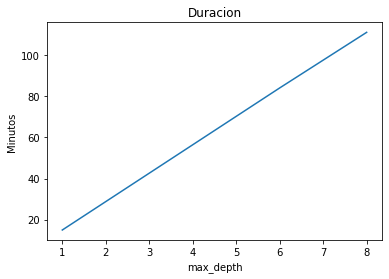

In [ ]:
plt.plot(rango_gbm_md,duracion_gbm_md)
plt.title("Duracion")
plt.xlabel('max_depth')
plt.ylabel('Minutos')
plt.show()

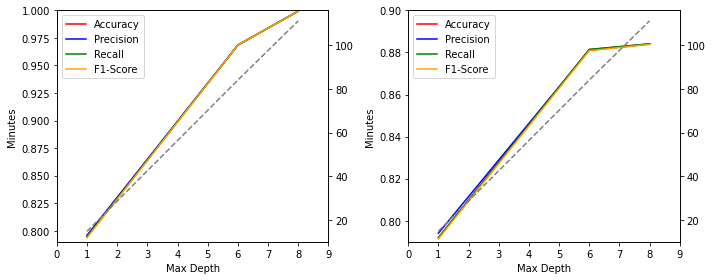

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1a = ax1.twinx()
ax1.plot(rango_gbm_md, accuracies_train_gbm_md, label = 'Accuracy', color='red')
ax1.plot(rango_gbm_md, precisions_train_gbm_md, label = 'Precision', color='blue')
ax1.plot(rango_gbm_md, recalls_train_gbm_md, label = 'Recall', color='green')
ax1.plot(rango_gbm_md, f1s_train_gbm_md, label = 'F1-Score', color='orange')
ax1.set_xlabel('Max Depth')
ax1.set_ylabel('Metrics')
ax1a.plot(rango_gbm_md, duracion_gbm_md, color='gray',linestyle='--')
ax1.set_ylabel('Minutes')
ax1.legend()

ax2a = ax2.twinx()
#nótese que el promedio pesado de recall es igual a accuracy
ax2.plot(rango_gbm_md, accuracies_val_gbm_md, label = 'Accuracy', color='red')
ax2.plot(rango_gbm_md, precisions_val_gbm_md, label = 'Precision', color='blue')
ax2.plot(rango_gbm_md, recalls_val_gbm_md, label = 'Recall', color='green')
ax2.plot(rango_gbm_md, f1s_val_gbm_md, label = 'F1-Score', color='orange')
ax2.set_xlabel('Max Depth')
ax2.set_ylabel('Metrics')
ax2a.plot(rango_gbm_md, duracion_gbm_md, color='gray',linestyle='--')
ax2.set_ylabel('Minutes')
ax2.legend()

ax1.axis([0, 9, 0.79, 1])
ax2.axis([0, 9, 0.79, 0.9])

plt.tight_layout()
plt.show()

In [ ]:
i = 0
while i < len(rango_gbm_md):
  print(f'Val Accuracy: {round(accuracies_val_gbm_md[i],4)}\nVal Precision: {round(precisions_val_gbm_md[i],4)}\nVal Recall: {round(recalls_val_gbm_md[i],4)}\nVal F1-Score: {round(f1s_val_gbm_md[i],4)}\nmax_depth: {rango_gbm_md[i]} \nduración: {duracion_gbm_md[i]} minutos\n-----------------------------------')
  i+=1

Val Accuracy: 0.7919
Val Precision: 0.7941
Val Recall: 0.7919
Val F1-Score: 0.7913
max_depth: 1 
duración: 15 minutos
-----------------------------------
Val Accuracy: 0.8814
Val Precision: 0.8811
Val Recall: 0.8814
Val F1-Score: 0.8808
max_depth: 6 
duración: 84 minutos
-----------------------------------
Val Accuracy: 0.8841
Val Precision: 0.884
Val Recall: 0.8841
Val F1-Score: 0.8838
max_depth: 8 
duración: 111 minutos
-----------------------------------


## Test

### Test sobre el conjunto de test (held out)

In [22]:
n_rf = 86
md_rf = 50
best_rf = RandomForestClassifier(n_estimators = n_rf, max_depth = md_rf,random_state=42)

best_rf.fit(flatten_train,train_labels)

RandomForestClassifier(max_depth=50, n_estimators=86, random_state=42)

In [31]:
n_gbm = 50
md_gbm = 6
#best_gbm = GradientBoostingClassifier(n_estimators = n_gbm, max_depth = md_gbm,random_state=42)
#best_gbm = modelos[1]

#best_gbm.fit(flatten_train,train_labels)

#pickle.dump(best_gbm, open('best_gbm.pkl', 'wb'))

GradientBoostingClassifier(max_depth=6, n_estimators=50, random_state=42)

In [16]:
best_gbm = pickle.load(open('best_gbm.pkl', 'rb'))

UnpicklingError: ignored

In [24]:
labels_pred_test_rf = best_rf.predict(flatten_test)

accuracy_test_rf = accuracy_score(test_labels,labels_pred_test_rf)
precision_test_rf = precision_score(test_labels,labels_pred_test_rf,average='weighted')
recall_test_rf = recall_score(test_labels,labels_pred_test_rf,average='weighted')
f1_test_rf = f1_score(test_labels,labels_pred_test_rf,average='weighted')

In [25]:
print(f'Val Accuracy: {round(accuracy_test_rf,4)}\nVal Precision: {round(precision_test_rf,4)}\nVal Recall: {round(recall_test_rf,4)}\nVal F1-Score: {round(f1_test_rf,4)}')

Val Accuracy: 0.8734
Val Precision: 0.8723
Val Recall: 0.8734
Val F1-Score: 0.872


In [26]:
print(f'\nRandom Forest\nn_estimators: {n_rf}\nmax_depth: {md_rf}\n{classification_report(test_labels, labels_pred_test_rf)}')


Random Forest
n_estimators: 86
max_depth: 50
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.76      0.81      0.78      1000
           3       0.87      0.90      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.70      0.58      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
labels_pred_test_gbm = best_gbm.predict(flatten_test)

accuracy_test_gbm = accuracy_score(test_labels,labels_pred_test_gbm)
precision_test_gbm = precision_score(test_labels,labels_pred_test_gbm,average='weighted')
recall_test_gbm = recall_score(test_labels,labels_pred_test_gbm,average='weighted')
f1_test_gbm = f1_score(test_labels,labels_pred_test_gbm,average='weighted')


In [ ]:
print(f'Val Accuracy: {round(accuracy_test_gbm,4)}\nVal Precision: {round(precision_test_gbm,4)}\nVal Recall: {round(recall_test_gbm,4)}\nVal F1-Score: {round(f1_test_gbm,4)}')

In [ ]:
print(f'\nGradient Boosting Machine\nn_estimators: {n_gbm}\nmax_depth: {md_gbm}\n{classification_report(test_labels, labels_pred_test_gbm)}')

### Matriz de confusión del mejor modelo

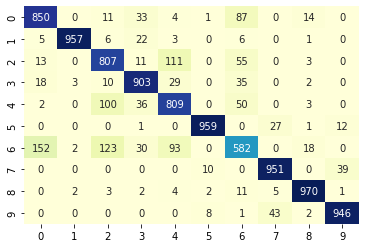

In [27]:
cm_r = confusion_matrix(test_labels, labels_pred_test_rf)
sns.heatmap(cm_r,annot=True,fmt='d',cmap='YlGnBu',cbar=False)

In [ ]:
cm_g = confusion_matrix(test_labels, labels_pred_test_gbm)
sns.heatmap(cm_g,annot=True,fmt='d',cmap='YlGnBu',cbar=False)

## Robustez

### Alteración de imágenes

In [6]:
flatten_test_changed = flatten_test

cantidad_de_pixeles_a_alterar = 30
np.random.seed(42)
seeds = np.random.randint(0, 10000, cantidad_de_pixeles_a_alterar)
for seed in seeds:
  np.random.seed(seed)
  indexes = np.random.randint(0, 784, 10000)
  values = np.random.randint(0, 255, 10000)

  for i,index,value in zip(range(10000),indexes,values):
    flatten_test_changed = tf.tensor_scatter_nd_update(flatten_test_changed, [[i,index]] , [value])

In [7]:
#desaplana las imágenes alteradas y las transforma a numpy.ndarrays #necesario parared neuronal
changed_images = tf.reshape(flatten_test_changed,[10000, 28, 28]).numpy()

In [ ]:
# imágenes orginales

plt.figure(figsize=(17,8))
for i,label_val in enumerate(np.unique(test_labels)):
  label_idxs = np.argwhere(test_labels == label_val)
  plt.subplot(2,5,i+1)
  plt.title(class_names[label_val])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(test_images[label_idxs[0]]),cmap='binary')
plt.tight_layout()

In [ ]:
#imágenes alteradas

plt.figure(figsize=(17,8))
for i,label_val in enumerate(np.unique(test_labels)):
  label_idxs = np.argwhere(test_labels == label_val)
  plt.subplot(2,5,i+1)
  plt.title(class_names[label_val])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(changed_images[label_idxs[0]]),cmap='binary')
plt.tight_layout()

### Prueba de robustez del modelo

In [28]:
prediction_rf = best_rf.predict(flatten_test_changed)


In [ ]:
prediction_gbm = best_gbm.predict(flatten_test_changed)

In [29]:
print(f'\nRandom Forest\nn_estimators: {n_rf}\nmax_depth: {md_rf}\n{classification_report(test_labels, prediction_rf)}')


Random Forest
n_estimators: 86
max_depth: 50
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.76      0.81      0.78      1000
           3       0.86      0.89      0.87      1000
           4       0.77      0.80      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.69      0.58      0.63      1000
           7       0.93      0.94      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



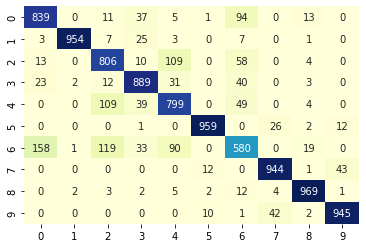

In [30]:
cm_rf = confusion_matrix(test_labels, prediction_rf)
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='YlGnBu',cbar=False)

In [ ]:
print(f'\nGradient Boosting Machine\nn_estimators: {n_gbm}\nmax_depth: {md_gbm}\n{classification_report(test_labels, prediction_gbm)}')


Gradient Boosting Machine
n_estimators: 50
max_depth: 6
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.76      0.80      0.78      1000
           3       0.87      0.88      0.88      1000
           4       0.80      0.78      0.79      1000
           5       0.98      0.94      0.96      1000
           6       0.67      0.62      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.91      0.96      0.94      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



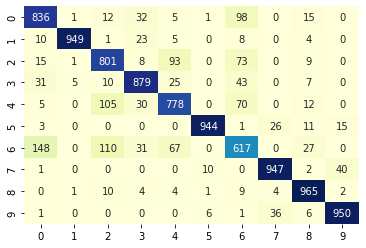

In [ ]:
cm_gbm = confusion_matrix(test_labels, prediction_gbm)
sns.heatmap(cm_gbm,annot=True,fmt='d',cmap='YlGnBu',cbar=False)

## Red neuronal

https://keras.io/examples/vision/mnist_convnet/

### Entrenamiento

In [8]:
num_classes = 10
input_shape = (28, 28, 1)

x_train = train_images.astype("float32") / 255
x_val = val_images.astype("float32") / 255
x_test = test_images.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)
#print("x_train shape:", x_train.shape)
#print(x_train.shape[0], "train samples")
#print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(train_labels, num_classes)
y_val = keras.utils.to_categorical(val_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

In [9]:
cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        tfkl.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tfkl.MaxPooling2D(pool_size=(2, 2)),
        tfkl.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tfkl.MaxPooling2D(pool_size=(2, 2)),
        tfkl.Flatten(),
        tfkl.Dropout(0.5),
        tfkl.Dense(num_classes, activation="softmax"),
    ]
)

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

batch_size = 128
epochs = 15

inicio = time.time()
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data= [x_val, y_val]) #reemplazamos validation_split por validation_data para usar mismo split que en los otros modelos
fin = time.time()
duracion = round(fin-inicio,2)

Epoch 1/15
375/375 [==============================] - 42s 110ms/step - loss: 0.7123 - accuracy: 0.7424
Epoch 2/15
375/375 [==============================] - 38s 102ms/step - loss: 0.4622 - accuracy: 0.8342
Epoch 3/15
375/375 [==============================] - 37s 100ms/step - loss: 0.4170 - accuracy: 0.8523
Epoch 4/15
375/375 [==============================] - 37s 99ms/step - loss: 0.3916 - accuracy: 0.8595
Epoch 5/15
375/375 [==============================] - 37s 99ms/step - loss: 0.3701 - accuracy: 0.8673
Epoch 6/15
375/375 [==============================] - 37s 98ms/step - loss: 0.3503 - accuracy: 0.8741
Epoch 7/15
375/375 [==============================] - 37s 99ms/step - loss: 0.3373 - accuracy: 0.8777
Epoch 8/15
375/375 [==============================] - 37s 100ms/step - loss: 0.3255 - accuracy: 0.8817
Epoch 9/15
375/375 [==============================] - 37s 98ms/step - loss: 0.3167 - accuracy: 0.8863
Epoch 10/15
375/375 [==============================] - 37s 99ms/step - loss: 0

In [12]:
score = cnn.evaluate(x_val, y_val, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Duración (minutos):", duracion/60)

Test loss: 0.2655862271785736
Test accuracy: 0.9034166932106018
Duración (minutos): 9.591166666666668


### Prueba en test (held-out)

In [21]:
score = cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Duración (minutos):", duracion/60)

Test loss: 0.2807246148586273
Test accuracy: 0.8973000049591064
Duración (minutos): 9.591166666666668


In [13]:
prediction_cnn = cnn.predict(x_test)

In [14]:
prediction_cnn_normalized = [np.argmax(prediction) for prediction in prediction_cnn]

In [15]:
print(f'\nCNN\n{classification_report(test_labels, prediction_cnn_normalized)}')


CNN
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       1.00      0.98      0.99      1000
           2       0.89      0.79      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.82      0.87      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.67      0.71      0.69      1000
           7       0.95      0.97      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



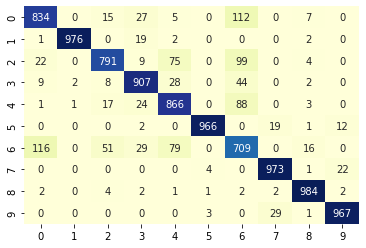

In [16]:
cm_cnn = confusion_matrix(test_labels, prediction_cnn_normalized)
sns.heatmap(cm_cnn,annot=True,fmt='d',cmap='YlGnBu',cbar=False)

### Análisis de robustez

In [17]:
changed_images_for_cnn = changed_images.astype("float32") / 255
changed_images_for_cnn = np.expand_dims(changed_images_for_cnn, -1)

prediction_changed_cnn = cnn.predict(changed_images_for_cnn)

In [18]:
prediction_changed_cnn_normalized = [np.argmax(prediction) for prediction in prediction_changed_cnn]

In [19]:
print(f'\nCNN\n{classification_report(test_labels, prediction_changed_cnn_normalized)}')


CNN
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.91      0.69      0.79      1000
           3       0.88      0.90      0.89      1000
           4       0.79      0.82      0.80      1000
           5       0.99      0.92      0.95      1000
           6       0.59      0.76      0.66      1000
           7       0.93      0.96      0.95      1000
           8       0.94      0.98      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



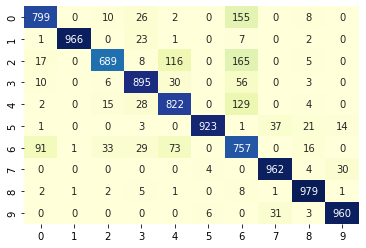

In [20]:
cm_changed_cnn = confusion_matrix(test_labels, prediction_changed_cnn_normalized)
sns.heatmap(cm_changed_cnn,annot=True,fmt='d',cmap='YlGnBu',cbar=False)